In [74]:
import pandas as pd
import numpy as np
import folium
from folium import plugins
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font',family='Malgun Gothic')

In [75]:
# 데이터 불러오기
case = pd.read_csv('data/Case.csv')
pat_info = pd.read_csv('data/PatientInfo.csv')
policy = pd.read_csv('data/Policy.csv')
region = pd.read_csv('data/Region.csv')
search_trend = pd.read_csv('data/SearchTrend.csv')
seoul_floating = pd.read_csv('data/SeoulFloating.csv')
time = pd.read_csv('data/Time.csv')
time_age = pd.read_csv('data/TimeAge.csv')
time_gender = pd.read_csv('data/TimeGender.csv')
time_province = pd.read_csv('data/TimeProvince.csv')
weather = pd.read_csv('data/Weather.csv')
region_final = pd.read_csv('data/Region_final.csv')

In [76]:
region_final

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,bar_count,restraunt_count,patient_count,cafe_count,gym_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739,NaN,NaN,NaN,NaN,NaN
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088,179.0,380.0,83.0,80.0,292.0
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023,116.0,257.0,35.0,14.0,64.0
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628,64.0,248.0,24.0,5.0,130.0
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080,126.0,411.0,78.0,20.0,166.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,61160,Gyeongsangnam-do,Haman-gun,35.272481,128.406540,16,20,0,1.19,23.74,14.7,94,NaN,NaN,NaN,NaN,NaN
240,61170,Gyeongsangnam-do,Hamyang-gun,35.520541,127.725177,13,12,0,1.01,32.65,20.9,83,NaN,NaN,NaN,NaN,NaN
241,61180,Gyeongsangnam-do,Hapcheon-gun,35.566702,128.165870,17,15,0,0.71,38.44,24.7,96,NaN,NaN,NaN,NaN,NaN
242,70000,Jeju-do,Jeju-do,33.488936,126.500423,113,123,4,1.53,15.10,6.4,1245,NaN,NaN,NaN,NaN,NaN


In [77]:
region_final.loc[(region.province =='Seoul')]

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,bar_count,restraunt_count,patient_count,cafe_count,gym_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739,NaN,NaN,NaN,NaN,NaN
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088,179.0,380.0,83.0,80.0,292.0
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023,116.0,257.0,35.0,14.0,64.0
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628,64.0,248.0,24.0,5.0,130.0
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080,126.0,411.0,78.0,20.0,166.0
5,10050,Seoul,Gwanak-gu,37.478290,126.951502,22,33,1,0.89,15.12,4.9,909,188.0,309.0,113.0,11.0,158.0
6,10060,Seoul,Gwangjin-gu,37.538712,127.082366,22,33,3,1.16,13.75,4.8,723,14.0,254.0,17.0,15.0,104.0
7,10070,Seoul,Guro-gu,37.495632,126.887650,26,34,3,1.00,16.21,5.7,741,32.0,504.0,85.0,10.0,156.0
8,10080,Seoul,Geumcheon-gu,37.456852,126.895229,18,19,0,0.96,16.15,6.7,475,48.0,274.0,32.0,10.0,88.0
9,10090,Seoul,Nowon-gu,37.654259,127.056294,42,66,6,1.39,15.40,7.4,952,21.0,376.0,43.0,13.0,232.0


In [78]:
region_final_seoul = region.loc[:25]

In [79]:
region_final_seoul

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
5,10050,Seoul,Gwanak-gu,37.478290,126.951502,22,33,1,0.89,15.12,4.9,909
6,10060,Seoul,Gwangjin-gu,37.538712,127.082366,22,33,3,1.16,13.75,4.8,723
7,10070,Seoul,Guro-gu,37.495632,126.887650,26,34,3,1.00,16.21,5.7,741
8,10080,Seoul,Geumcheon-gu,37.456852,126.895229,18,19,0,0.96,16.15,6.7,475
9,10090,Seoul,Nowon-gu,37.654259,127.056294,42,66,6,1.39,15.40,7.4,952


# 1. 해외유입과 집단감염 확진자의 분포를 알기 위한 데이터 추출

In [80]:
# pat_info 데이터 프레임 화
df_info = pd.DataFrame(pat_info)

In [81]:
# region_new 데이터 프레임 화
df_region_final_seoul = pd.DataFrame(region_final_seoul)

In [82]:
result = pd.merge(df_region_final_seoul, df_info, on=['city','province'])
result.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,...,age,country,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,...,20s,Korea,Shincheonji Church,NaN,NaN,NaN,2020-02-26,2020-03-11,NaN,released
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,...,30s,Korea,etc,NaN,NaN,NaN,2020-02-27,NaN,NaN,released
2,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,...,30s,Korea,contact with patient,1000000047,NaN,2020-02-26,2020-02-29,2020-03-04,NaN,released
3,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,...,30s,Korea,contact with patient,1000000068,NaN,NaN,2020-02-29,2020-03-14,NaN,released
4,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,...,30s,Korea,etc,NaN,NaN,NaN,2020-02-29,2020-03-04,NaN,released


## 1-1. subset = [(시,도), 도시, 위도, 경도, 감염 요인]

In [83]:
subset = pd.DataFrame(result[['province','city', 'latitude', 'longitude','infection_case']])
subset.head()

,province,city,latitude,longitude,infection_case
0,Seoul,Gangnam-gu,37.518421,127.047222,Shincheonji Church
1,Seoul,Gangnam-gu,37.518421,127.047222,etc
2,Seoul,Gangnam-gu,37.518421,127.047222,contact with patient
3,Seoul,Gangnam-gu,37.518421,127.047222,contact with patient
4,Seoul,Gangnam-gu,37.518421,127.047222,etc


In [84]:
# 시군구 카운팅
sigungu_count = result[['latitude','longitude']].dropna() 
sigungu_count.head()

,latitude,longitude
0,37.518421,127.047222
1,37.518421,127.047222
2,37.518421,127.047222
3,37.518421,127.047222
4,37.518421,127.047222


# 2. 전국 지도에 표시 후, 서울 지역만 뽑아서 분석하였습니다.

In [85]:
# 지도로 구현
n = folium.Map([36.4, 128], zoom_start=6)

plugins.MousePosition().add_to(n) 

plugins.MarkerCluster(sigungu_count).add_to(n)

n

## 2-1. 서울 지역 감염 원인 순위

- 서울 지역은 해외 유입과 집단 감염 및 접촉으로 인한 감염이 제일 많은 것으로 보인다.

In [86]:
subset_seoul = pd.DataFrame(subset[subset.province == 'Seoul'])
subset_seoul= subset_seoul.reset_index()
subset_seoul['infection_case'].value_counts()

overseas inflow                                  284
contact with patient                             163
Itaewon Clubs                                    136
Richway                                          113
Guro-gu Call Center                               92
etc                                               88
Day Care Center                                   43
Yangcheon Table Tennis Club                       37
SMR Newly Planted Churches Group                  35
Coupang Logistics Center                          25
Wangsung Church                                   23
Dongan Church                                     17
Eunpyeong St. Mary's Hospital                     13
Seongdong-gu APT                                  13
KB Life Insurance                                 12
Korea Campus Crusade of Christ                     7
Gangnam Yeoksam-dong gathering                     6
Geumcheon-gu rice milling machine manufacture      6
Yeonana News Class                            

In [88]:
# subset_seoul['infection_case'].value_counts()) 데이터 프레임 화
df_s_s = pd.DataFrame(subset_seoul['infection_case'].value_counts())

## 20년도 01~06월경 코로나 확진자 수에 영향을 준 요인으로는
### overseas inflow, contact with patient, Itaewon Club 순으로 확진자가 있다는 것을 확인 할 수 있었습니다.

<AxesSubplot:>

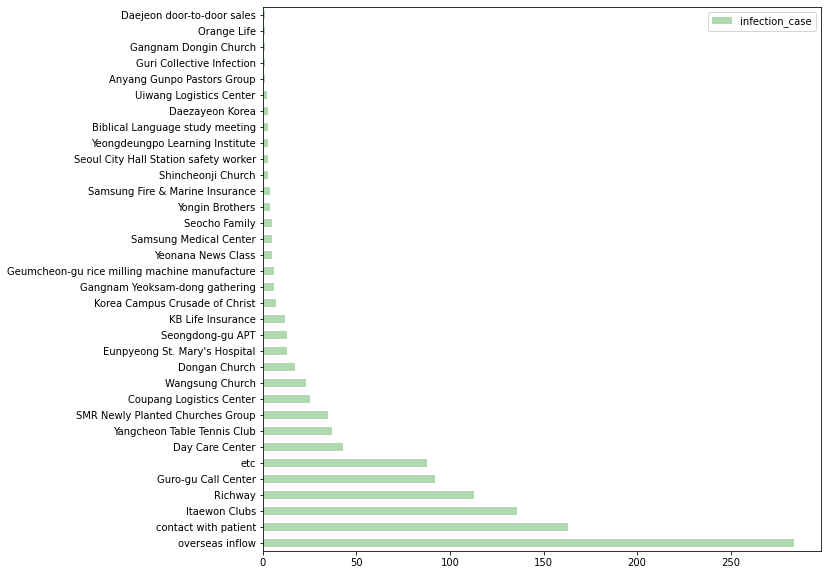

In [89]:
df_s_s.plot(kind = "barh",color='g', alpha=0.3, figsize=(10, 10))

## 2-3. 지도에 표시하기 위해 위도, 경도, 감염 요인으로 데이터 추출

- 감염 요인의 경우의 수를 count (같은 위도와 경도별로)

In [90]:
df_map = subset.groupby(["latitude", "longitude",'infection_case']).size().reset_index(name="count")
df_map

,latitude,longitude,infection_case,count
0,37.456852,126.895229,Anyang Gunpo Pastors Group,1
1,37.456852,126.895229,Coupang Logistics Center,2
2,37.456852,126.895229,Guro-gu Call Center,3
3,37.456852,126.895229,Itaewon Clubs,2
4,37.456852,126.895229,Korea Campus Crusade of Christ,1
...,...,...,...,...
232,37.668952,127.047082,Dongan Church,1
233,37.668952,127.047082,Itaewon Clubs,6
234,37.668952,127.047082,contact with patient,3
235,37.668952,127.047082,etc,2


## 2-4 색깔 지정 (해외유입 - green, 접촉 감염 - orange, etc - red)

In [91]:
df_map['color']=0
for x in range(len(df_map)):
    if (df_map['infection_case'][x] == 'overseas inflow'):    
        df_map['color'][x] = 'green'
    else :    
        df_map['color'][x] = 'orange'
#     else:
#        df_map['color'][x] = 'red'   # 미확인
df_map

,latitude,longitude,infection_case,count,color
0,37.456852,126.895229,Anyang Gunpo Pastors Group,1,orange
1,37.456852,126.895229,Coupang Logistics Center,2,orange
2,37.456852,126.895229,Guro-gu Call Center,3,orange
3,37.456852,126.895229,Itaewon Clubs,2,orange
4,37.456852,126.895229,Korea Campus Crusade of Christ,1,orange
...,...,...,...,...,...
232,37.668952,127.047082,Dongan Church,1,orange
233,37.668952,127.047082,Itaewon Clubs,6,orange
234,37.668952,127.047082,contact with patient,3,orange
235,37.668952,127.047082,etc,2,orange


## 2-5. 서울 지역의 해외 유입 및 환자 접촉 감염을 표시

### - contact with patient = 주황색, overseas inflow = 녹색

In [92]:
m = folium.Map(location=[37.5600,126.98], tiles="cartodbpositron", zoom_start=6)
for x in range(len(df_map)):
    location = [df_map['latitude'][x],df_map['longitude'][x]]
    radius=df_map['count'][x]*1.3

    folium.CircleMarker(
        location,
        radius,
        popup=df_map['infection_case'][x],
        color=df_map['color'][x],
        fill=True,
        fill_color=df_map['color'][x],
        control_scale=True
    ).add_to(m)
m